In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\Vinay\Downloads\Flight_Data (1).csv")

# Creating a Data Copy
datacopy = data.copy()
datacopy.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,1/1/2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2/1/2018
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,3/1/2018
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,4/1/2018
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5/1/2018


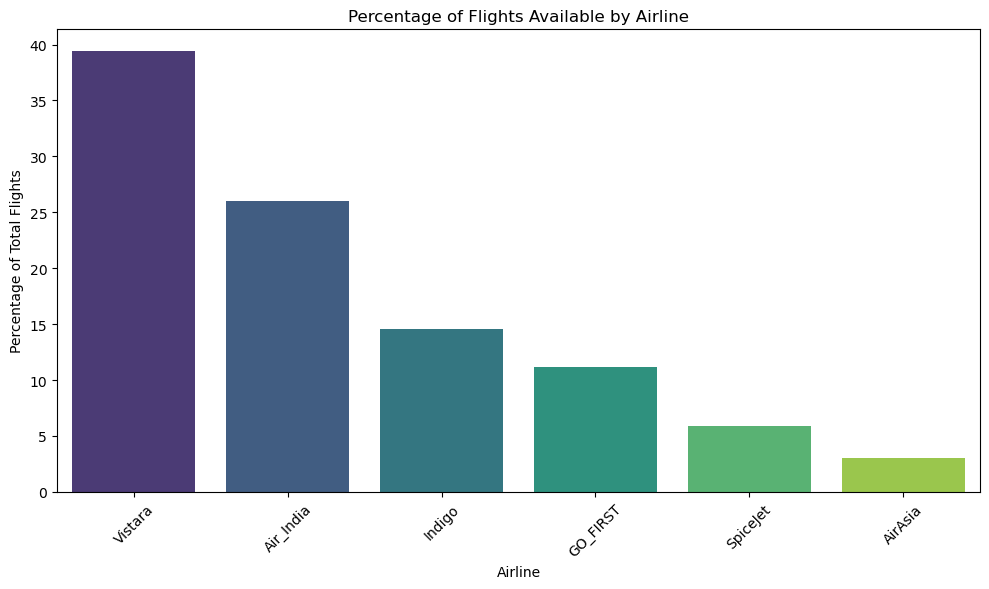

In [11]:
# Percentage of Flights available vs airline
flight_count = datacopy.groupby(["airline"], as_index=False)['flight'].count()
flight_count.rename(columns={'flight': 'Count_Flights', 'airline': 'Airline'}, inplace=True)
total_flights = flight_count['Count_Flights'].sum()
flight_count['Percentage'] = ((flight_count['Count_Flights'] / total_flights) * 100).round(2)
flight_count.sort_values(by="Count_Flights", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Percentage', data=flight_count, palette='viridis')
plt.title('Percentage of Flights Available by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Total Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("percentage_flights_airline.png")
plt.show()

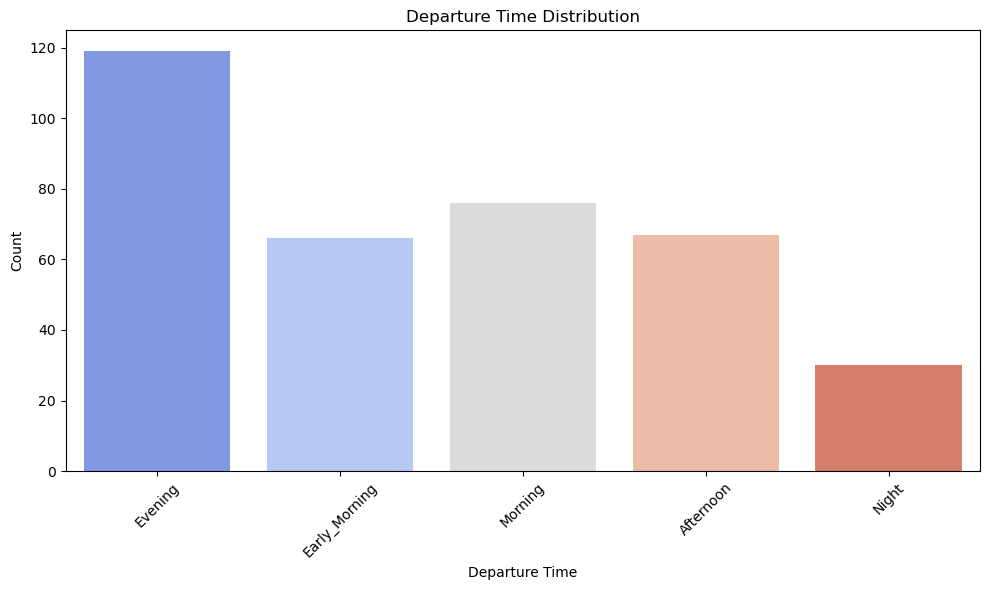

In [13]:
# Departure time distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='departure_time', data=datacopy, palette='coolwarm')
plt.title('Departure Time Distribution')
plt.xlabel('Departure Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("departure_time_distribution.png")
plt.show()

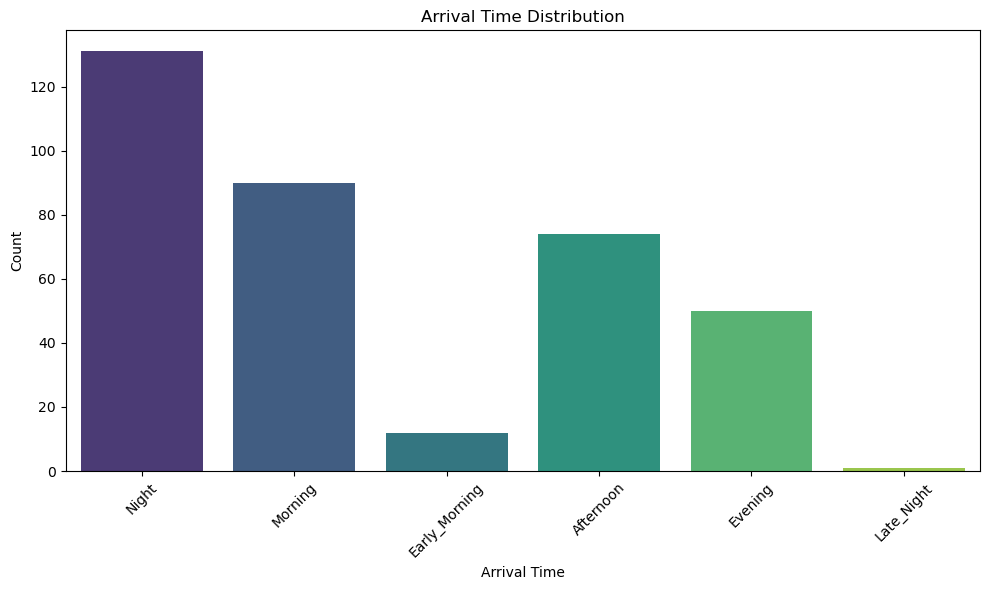

In [15]:
# Arrival time distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_time', data=datacopy, palette='viridis')
plt.title('Arrival Time Distribution')
plt.xlabel('Arrival Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("arrival_time_distribution.png")
plt.show()

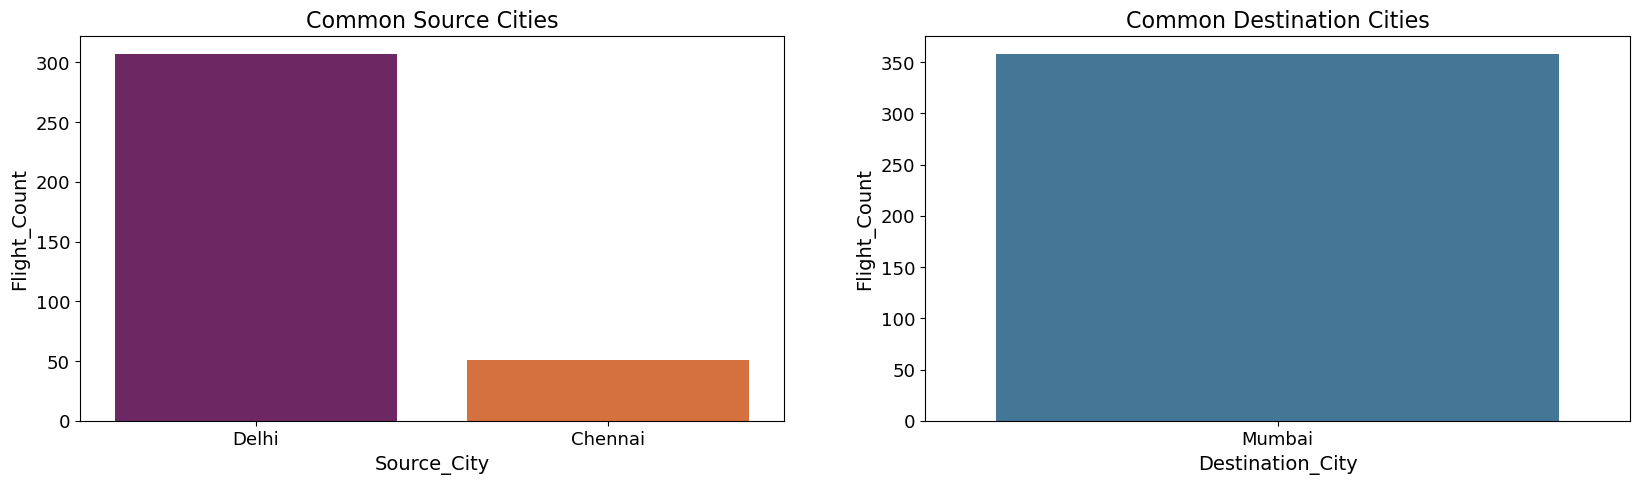

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\Vinay\Downloads\Flight_Data (1).csv")

# Creating a Data Copy
dataCopy = data.copy()
# Common destination cities from each source city....
Common_Destination = dataCopy['destination_city'].value_counts().reset_index()
Common_Destination.rename(columns={'destination_city': 'Destination_City', 'count':'Flight_Count'}, inplace=True)
Common_Destination.sort_values

# Common Source cities....
Common_Source = dataCopy['source_city'].value_counts().reset_index()
Common_Source.rename(columns={'source_city': 'Source_City', 'count':'Flight_Count'}, inplace=True)
Common_Source.sort_values

plot, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.barplot(x = 'Source_City', y = 'Flight_Count', data = Common_Source, ax = axis[0], palette='inferno')
axis[0].set_xlabel('Source_City', fontsize=14)
axis[0].set_ylabel('Flight_Count', fontsize=14)
axis[0].tick_params(axis='both', labelsize=13)
axis[0].set_title('Common Source Cities', fontsize = 16)

sns.barplot(x = 'Destination_City', y = 'Flight_Count', data = Common_Destination, ax = axis[1], palette='mako')
axis[1].set_xlabel('Destination_City', fontsize=14)
axis[1].set_ylabel('Flight_Count', fontsize=14)
axis[1].tick_params(axis='both', labelsize=13)
axis[1].set_title('Common Destination Cities', fontsize = 16)
plt.show()